In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as st
import plotly.express as px

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 8
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['font.size'] = '16'

In [4]:
df_b = pd.read_csv('dengan_oh1.csv')

In [12]:
df_b

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered_oh1,Weight_in_gms,Product_importance_labeled,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,is_shipping_late
0,4,2,177,3,19.0,1233,0,0,0,0,1,0,1,0,1,0,0,1
1,4,5,216,2,19.0,3088,0,0,0,0,0,1,0,1,1,0,0,1
2,2,2,183,4,19.0,3374,0,1,0,0,0,0,0,1,1,0,0,1
3,3,3,176,4,10.0,1177,1,0,1,0,0,0,0,1,1,0,0,1
4,2,2,184,3,19.0,2484,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1.0,1538,1,1,0,0,0,0,1,0,0,0,1,1
10995,4,1,232,5,6.0,1247,1,0,1,0,0,0,1,0,0,0,1,0
10996,5,4,242,5,4.0,1155,0,0,0,1,0,0,1,0,0,0,1,0
10997,5,2,223,6,2.0,1210,1,0,0,0,0,1,0,1,0,0,1,0


# STAGE 3

In [10]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option("max_column",100)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

# data&nbsp;b&nbsp;

In [13]:
X = df_b.drop(columns=['is_shipping_late'])
y = df_b['is_shipping_late']
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Default param

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.71
Recall (Test Set): 0.71
F1-Score (Test Set): 0.71
AUC: 0.63


In [17]:
# 
print('Train score: ' + str(model.score(X_train, y_train))) 
print('Test score: ' + str(model.score(X_test, y_test)))

Train score: 1.0
Test score: 0.6503030303030303


In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42)
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.73
Recall (Test Set): 0.65
F1-Score (Test Set): 0.69
AUC: 0.72


In [21]:
model.best_estimator_

DecisionTreeClassifier(max_depth=87, max_features='auto', min_samples_leaf=50,
                       min_samples_split=10, random_state=42)

In [25]:
model.feature

array(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered_oh1', 'Weight_in_gms',
       'Product_importance_labeled', 'Warehouse_block_A',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Gender_F', 'Gender_M',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship'], dtype=object)

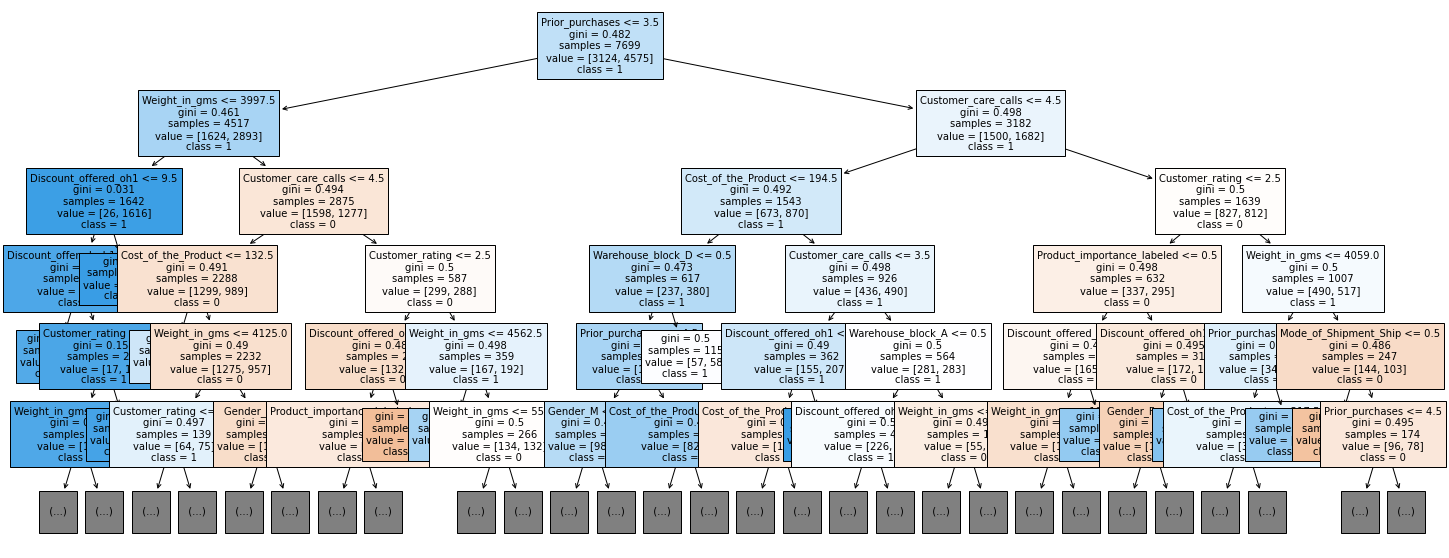

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 10))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

In [27]:
from sklearn.feature_selection import RFE


In [29]:
temp = DecisionTreeClassifier(random_state=1)

In [31]:
n_features_to_select = 1
rfe = RFE(temp, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

from operator import itemgetter
features = X_train.columns.to_list()
for i, j in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(i, j)

1 Weight_in_gms
2 Discount_offered_oh1
3 Cost_of_the_Product
4 Customer_care_calls
5 Prior_purchases
6 Customer_rating
7 Product_importance_labeled
8 Mode_of_Shipment_Ship
9 Warehouse_block_F
10 Warehouse_block_B
11 Warehouse_block_D
12 Mode_of_Shipment_Flight
13 Warehouse_block_A
14 Gender_F
15 Mode_of_Shipment_Road
16 Warehouse_block_C
17 Gender_M


In [32]:
feat_imp = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases',
            'Discount_offered_oh1','Weight_in_gms','Product_importance_labeled',
            'Warehouse_block_B','Warehouse_block_F','Mode_of_Shipment_Ship']
X = df_b[feat_imp]
y = df_b.is_shipping_late

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [34]:
model_fin = DecisionTreeClassifier(max_depth=87, max_features='auto', min_samples_leaf=50,
                                   min_samples_split=10, random_state=42)

In [38]:
predict_final = model_fin.fit(X_train, y_train)

In [40]:
eval_classification(model_fin, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.75
Recall (Test Set): 0.65
F1-Score (Test Set): 0.70
AUC: 0.74


In [ ]:
model_fin

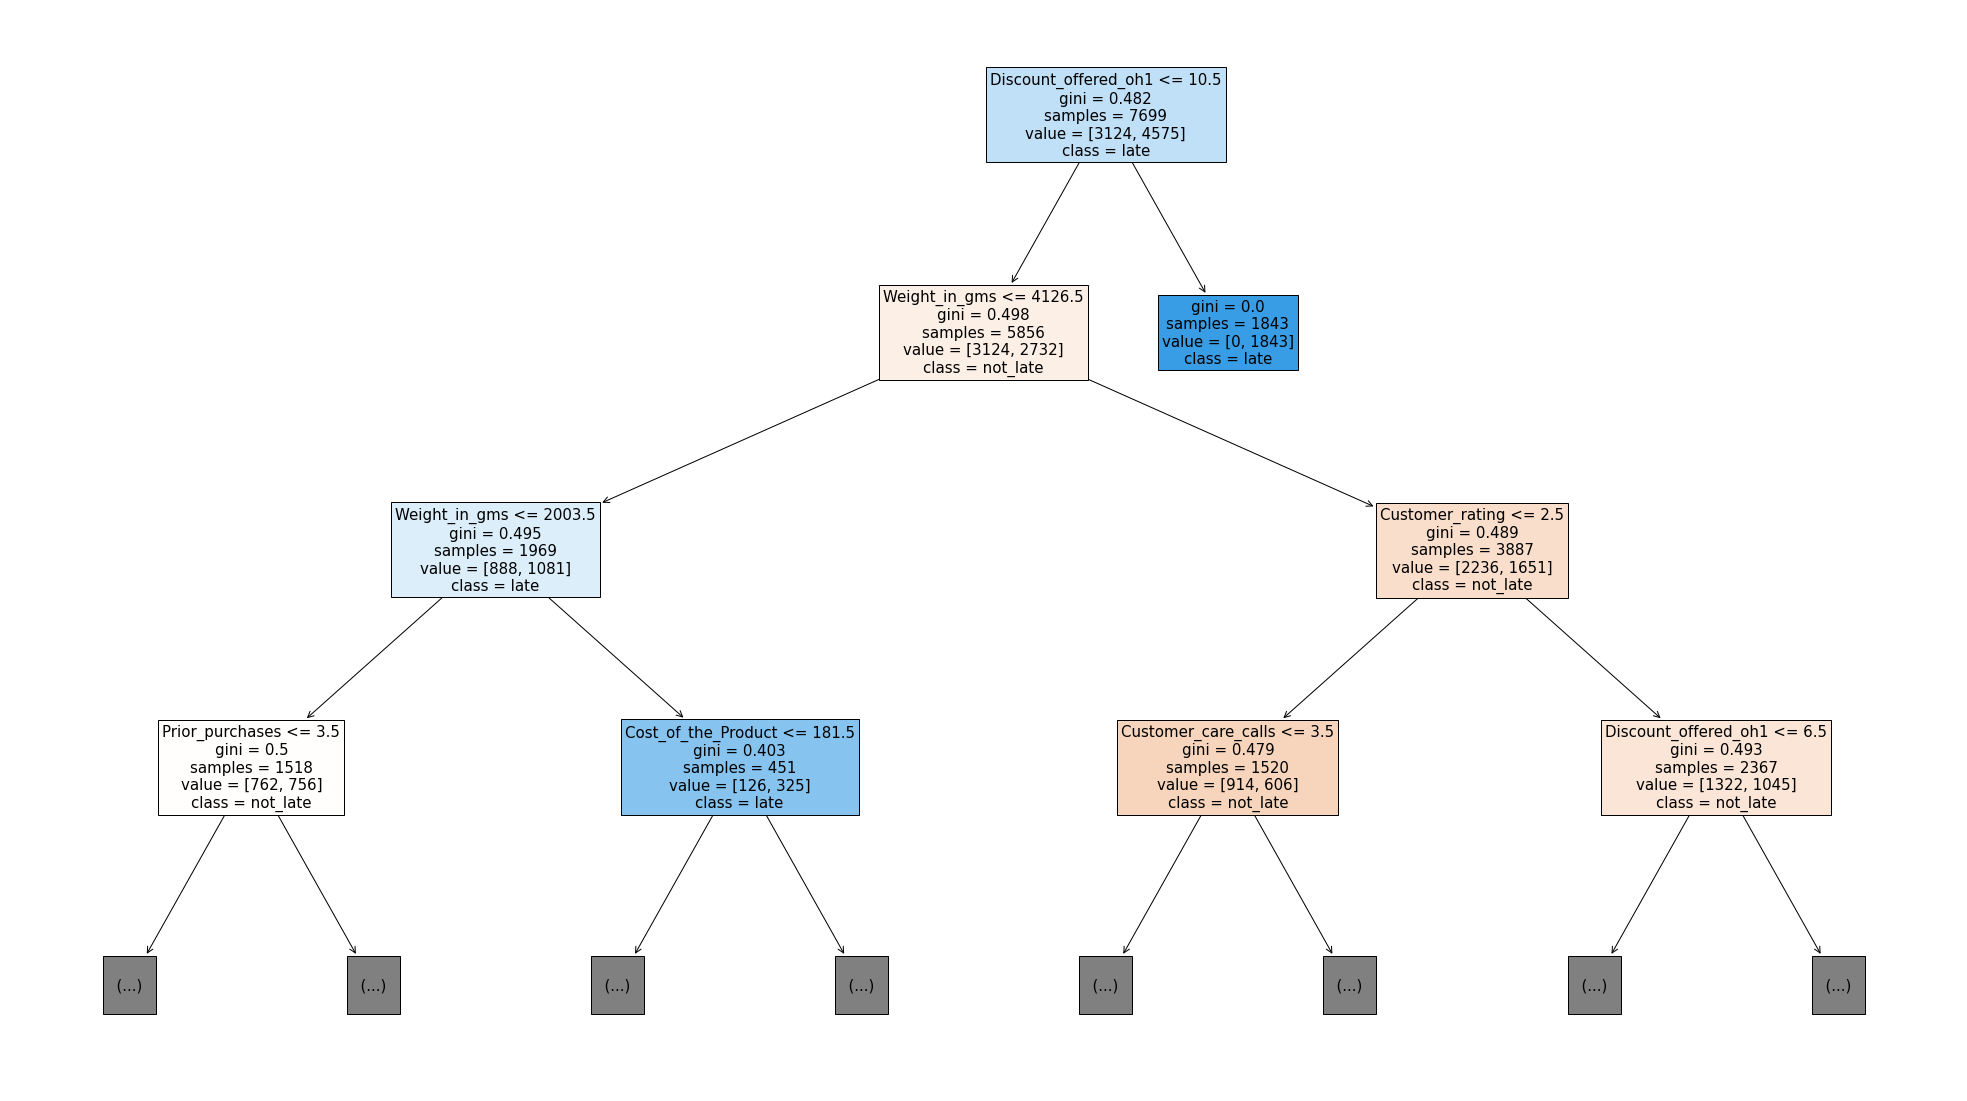

In [52]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(35, 20))
tree.plot_tree(model_fin,
               feature_names = X.columns.tolist(), 
               class_names=['not_late','late'],
               filled = True, max_depth=3, fontsize=15)
plt.show()